In [1]:
from google.colab import files

uploaded = files.upload()

Saving ready.outcome2.csv to ready.outcome2.csv


In [2]:
import pandas as pd
import io

outcome2 = pd.read_csv(io.BytesIO(uploaded['ready.outcome2.csv']))
print(outcome2)

      v000  v007  v012  v013  v025  v106  v190  \
0      NG7  2018    40     6     1     4     5   
1      NG7  2018    37     5     1     4     5   
2      NG7  2018    27     3     1     4     5   
3      NG7  2018    27     3     1     3     5   
4      NG7  2018    24     2     1     3     5   
...    ...   ...   ...   ...   ...   ...   ...   
88392  ZW7  2015    31     4     0     2     2   
88393  ZW7  2015    39     5     0     2     3   
88394  ZW7  2015    32     4     0     3     3   
88395  ZW7  2015    24     2     0     2     2   
88396  ZW7  2015    40     6     0     2     3   

                                      v501      v501a             v501b  ...  \
0                      living with partner  Unmarried     Never married  ...   
1                                  married    Married           Married  ...   
2                                  married    Married           Married  ...   
3                                  married    Married           Married  ...   

In [3]:
from sklearn.model_selection import train_test_split
outcome2_train, outcome2_test = train_test_split(
outcome2, test_size=0.35, stratify=outcome2[['v000', 'v481']])

x_train = outcome2_train[['v000_AO7', 'v000_EG6', 'v000_ET7', 'v000_GA6', 'v000_GH6', 'v000_KE6', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 
                          'v000_ZM7', 'v000_ZW7', 'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'v213', 'v228', 'm14', 'ANC.facility', 'v312', 'm15', 'v401', 'child_loss']]
y_train = outcome2_train['v481']


x_test = outcome2_test[['v000_AO7', 'v000_EG6', 'v000_ET7', 'v000_GA6', 'v000_GH6', 'v000_KE6', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 
                          'v000_ZM7', 'v000_ZW7', 'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'v213', 'v228', 'm14', 'ANC.facility', 'v312', 'm15', 'v401', 'child_loss']]
y_test = outcome2_test['v481']


print(outcome2_train.shape, outcome2_test.shape)
print(x_train.shape, x_test.shape)

(57458, 33) (30939, 33)
(57458, 26) (30939, 26)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic: ROC AUC=0.897


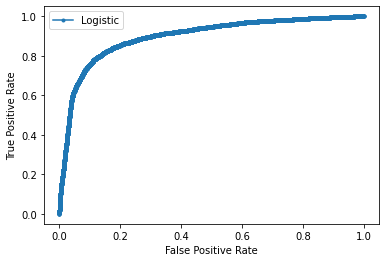

In [5]:
# roc curve and auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model = MultinomialNB()
model.fit(x_train, y_train)
labels = model.predict(x_test)
nb_train_accuracy = []
nb_test_accuracy = []
nb_train_accuracy.append(model.score(x_train, y_train))
nb_test_accuracy.append(model.score(x_test, y_test))
print(nb_train_accuracy, nb_test_accuracy)

cv_train = cross_val_score(model, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(model, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(model, x_test, y_test, cv=10)

accuracy = pd.DataFrame()
accuracy = accuracy.append([["Naive Baye's", (cv_train.mean()), (cv_test.mean())]])

[0.9135716523373595] [0.912505252270597]
Percent accuracy within each fold (First): 

[0.91106857 0.91385312 0.91176471 0.91420118 0.91646363 0.9096763
 0.91924817 0.90898016 0.91818973 0.91122715] 
 [0.91758242 0.9114415  0.90723982 0.91305753 0.90950226 0.91338074
 0.91758242 0.91628959 0.91241112 0.90688652]

Mean & SD accuracy: 

0.9134672714389879 0.9125373912901725
0.003369901614323646 0.003693114477089309


Naive Bayes: ROC AUC=0.853


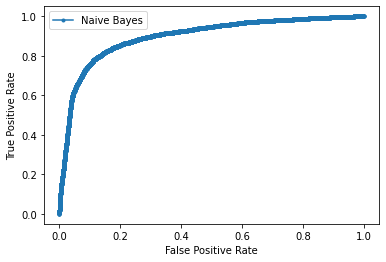

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# fit a model
model_2 = MultinomialNB()
model_2.fit(x_train, y_train)
# predict probabilities
nb_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
nb_auc = roc_auc_score(y_test, nb_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
labels_tree = tree.predict(x_test)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

cv_train = cross_val_score(tree, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(tree, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(tree, x_test, y_test, cv=10)

accuracy = accuracy.append([["Decision Tree (Entropy)", (cv_train.mean()), (cv_test.mean())]])


Accuracy on training set: 0.961
Accuracy on test set: 0.898
Percent accuracy within each fold (First): 

[0.90184476 0.90288897 0.90219283 0.90236686 0.89784198 0.89906022
 0.90584755 0.8964497  0.89817232 0.89939077] 
 [0.89010989 0.88946348 0.88914027 0.8804137  0.88623142 0.88849386
 0.89657401 0.88429218 0.89366516 0.88975105]

Mean & SD accuracy: 

0.9006055962947851 0.8888135019731985
0.0027302483319281198 0.00429675810289282


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
clf_gini.fit(x_train, y_train)
labels_gini = clf_gini.predict(x_test)

print("Accuracy on training set: {:.3f}".format(clf_gini.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_gini.score(x_test, y_test)))

cv_train = cross_val_score(clf_gini, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(clf_gini, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(clf_gini, x_test, y_test, cv=10)

accuracy = accuracy.append([["Decision Tree (Gini)", (cv_train.mean()), (cv_test.mean())]])

Accuracy on training set: 0.929
Accuracy on test set: 0.916
Percent accuracy within each fold (First): 

[0.91820397 0.91489732 0.91576749 0.92064045 0.91507135 0.9178559
 0.91715976 0.9173338  0.91818973 0.91662315] 
 [0.91305753 0.91241112 0.91111829 0.90497738 0.91531997 0.91079509
 0.91693601 0.91338074 0.91790562 0.90817976]

Mean & SD accuracy: 

0.9171742919053386 0.9124081506063589
0.0016274399443618715 0.0037139120256914947


Decision Tree: ROC AUC=0.886


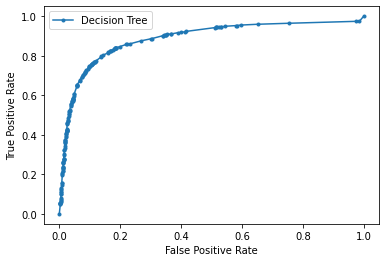

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
model_2.fit(x_train, y_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Decision Tree: ROC AUC=0.763


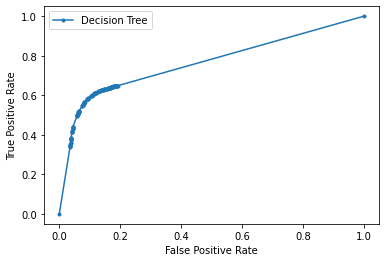

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(x_train, y_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
labels_rf = forest.predict(x_test)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

cv_train = cross_val_score(forest, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(forest, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(forest, x_test, y_test, cv=10)

accuracy = accuracy.append([["Random Forest", (cv_train.mean()), (cv_test.mean())]])


Accuracy on training set: 0.961
Accuracy on test set: 0.909
Percent accuracy within each fold (First): 

[0.91333101 0.91507135 0.91193874 0.9168117  0.91211277 0.91089454
 0.91350505 0.90880613 0.91314186 0.90966057] 
 [0.90562379 0.9062702  0.90788623 0.90077569 0.90174531 0.90077569
 0.91241112 0.90820944 0.90982547 0.9033301 ]

Mean & SD accuracy: 

0.9125273721273389 0.9056853047866913
0.002281606652174675 0.0037844126928809284


Random Forest: ROC AUC=0.880


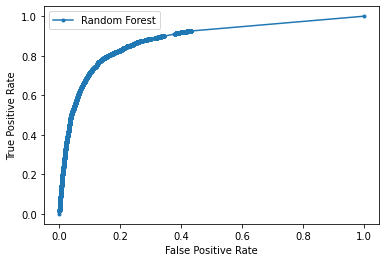

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

# fit a model
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_2.fit(x_train, y_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 10)
gbrt.fit(x_train, y_train)
labels_gbrt = gbrt.predict(x_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

cv_train = cross_val_score(gbrt, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(gbrt, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(gbrt, x_test, y_test, cv=10)

accuracy = accuracy.append([["Gradient Boost", (cv_train.mean()), (cv_test.mean())]])


Accuracy on training set: 0.952
Accuracy on test set: 0.912
Percent accuracy within each fold (First): 

[0.91646363 0.91350505 0.91367908 0.918378   0.91385312 0.91541942
 0.91872607 0.91141664 0.91679721 0.91470844] 
 [0.90982547 0.90400776 0.90950226 0.90077569 0.90271493 0.90982547
 0.91758242 0.90885585 0.90982547 0.909473  ]

Mean & SD accuracy: 

0.91529466595296 0.908238832353056
0.002195332906168908 0.0044996540716247405


Decision Tree: ROC AUC=0.899


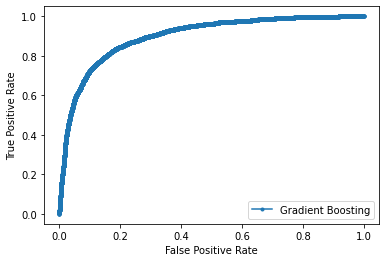

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier

# fit a model
model_2 = GradientBoostingClassifier(random_state=0, max_depth = 10)
model_2.fit(x_train, y_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
labels_svc = svc.predict(x_test)

print("Accuracy on training set: {:.3f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test, y_test)))

cv_train = cross_val_score(svc, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(svc, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(svc, x_test, y_test, cv=10)

accuracy = accuracy.append([["SVM", (cv_train.mean()), (cv_test.mean())]])

Accuracy on training set: 0.918
Accuracy on test set: 0.917
Percent accuracy within each fold (First): 

[0.91420118 0.91768187 0.9168117  0.91994431 0.92220675 0.91507135
 0.9244692  0.91176471 0.91993037 0.9129678 ] 
 [0.92049127 0.91822883 0.90982547 0.91758242 0.91467356 0.91596639
 0.92146089 0.91725921 0.91467356 0.9123828 ]

Mean & SD accuracy: 

0.9175049233931836 0.9162544402973454
0.0039156881758704775 0.003363507145887208


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_train_accuracy = []
knn_test_accuracy = []

neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)

    knn_train_accuracy.append(clf.score(x_train, y_train))
    knn_test_accuracy.append(clf.score(x_test, y_test))

print (knn_train_accuracy)
print (knn_test_accuracy)

[0.9477531414250409, 0.9312889414876954, 0.9328727070207804, 0.9285913188763967, 0.928660934943785, 0.9256848480629329, 0.9263984127536635, 0.9238922343276829, 0.9242229106477775, 0.9224651049462216, 0.923143861603258, 0.9213860559017021, 0.9223780848619861, 0.9206898952278186, 0.9213512478680079, 0.9198893104528525, 0.9208465313794424, 0.9204114309582652, 0.9210379755647603]
[0.8841591518795048, 0.90222696273312, 0.9045218009631856, 0.9093377290798021, 0.9120527489576263, 0.9114063156533825, 0.9130870422444164, 0.9124082872749604, 0.9146384821746016, 0.9139274055399335, 0.9152525938136333, 0.9135395455573871, 0.9152849154788455, 0.9151233071527846, 0.9154142021396943, 0.9138304405442969, 0.9155111671353308, 0.9152849154788455, 0.9160283137787258]


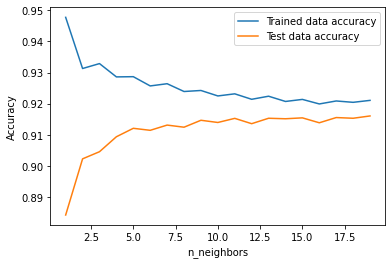

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, knn_train_accuracy, label= "Trained data accuracy")
plt.plot(neighbors_settings, knn_test_accuracy, label= "Test data accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 20)

clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

cv_train = cross_val_score(clf, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(clf, x_test, y_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

cv_labels = cross_val_predict(clf, x_test, y_test, cv=10)

accuracy = accuracy.append([["KNN", (cv_train.mean()), (cv_test.mean())]])


Accuracy on training set: 0.920
Accuracy on test set: 0.915
Percent accuracy within each fold (First): 

[0.91176471 0.91750783 0.91576749 0.91176471 0.91663766 0.90985033
 0.918378   0.90898016 0.91331593 0.91523064] 
 [0.90465417 0.90950226 0.90853264 0.91014867 0.90723982 0.91047188
 0.91370394 0.91370394 0.90659341 0.90850307]

Mean & SD accuracy: 

0.9139197449801989 0.9093053814825938
0.003096493187079155 0.0027441077092316643
